In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from IPython.core.display import display, HTML
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pickle

# display(HTML("<style>.container { width:100% !important; }</style>"))
# display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

**ID** : UniqueID <br>
**Estimated_Insects_Count** : Estimated insects count per square meter<br>
**Crop_Type** : Category of Crop(0,1)<br>
**Soil_Type** : Category of Soil (0,1)<br>
**Pesticide_Use_Category** : Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using)<br>
**Number_Doses_Week** : Number of doses per week<br>
**Number_Weeks_Used** : Number of weeks used<br>
**Number_Weeks_Quit** : Number of weeks quit<br>
**Season** : Season Category (1,2,3)<br>
**Crop_Damage** : Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)<br>

In [3]:
train= pd.read_csv('data/train.csv')
test= pd.read_csv('data/test.csv')

In [4]:
train['Crop_Damage'].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [5]:
a= train[train['Crop_Damage']==0].sample(2313)
b= train[train['Crop_Damage']==1].sample(2313)
c= train[train['Crop_Damage']==2].sample(2313)
train2=pd.concat([a,b,c])

In [6]:
train.shape

(88858, 10)

In [7]:
train.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [8]:
train.head(20)
#Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


In [9]:
print('Percentage of missing values :\n \n',train.isna().sum()/len(train)*100)

Percentage of missing values :
 
 ID                          0.00000
Estimated_Insects_Count     0.00000
Crop_Type                   0.00000
Soil_Type                   0.00000
Pesticide_Use_Category      0.00000
Number_Doses_Week           0.00000
Number_Weeks_Used          10.12852
Number_Weeks_Quit           0.00000
Season                      0.00000
Crop_Damage                 0.00000
dtype: float64


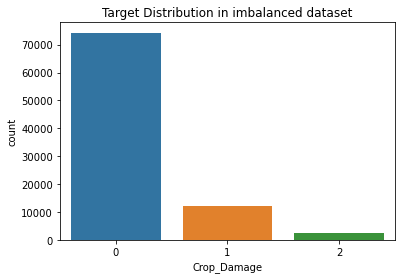

In [10]:
plt.title('Target Distribution in imbalanced dataset')
sns.countplot(x= train['Crop_Damage'])

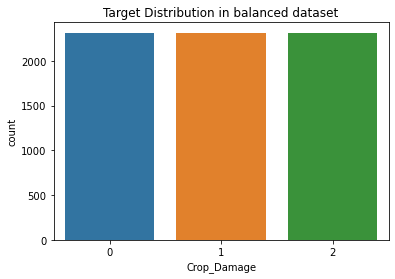

In [11]:
plt.title('Target Distribution in balanced dataset')
sns.countplot(x= train2['Crop_Damage'])

In [12]:
train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [13]:
def predict(train, model):
    if model=='rfc':
        rf= RandomForestClassifier()
        X= train.drop(['ID','Crop_Damage'],axis=1)
        y= train['Crop_Damage']
        train_x,val_x,train_y,val_y= train_test_split(X,y)
        rf.fit(train_x,train_y)
        answer= rf.predict(val_x)
    print('Accuracy is :',accuracy_score(answer,val_y.values)*100)
#sample model after dropping all the null values
train_nona= train.dropna()
predict(train_nona,'rfc')

Accuracy is : 82.21387427998998


In [14]:
train2_nona= train2.dropna()
predict(train2_nona,'rfc')

Accuracy is : 52.02833226014166


Q0: Does more insect means more damage of crops?

Text(0.5, 1.0, 'Balanced dataset')

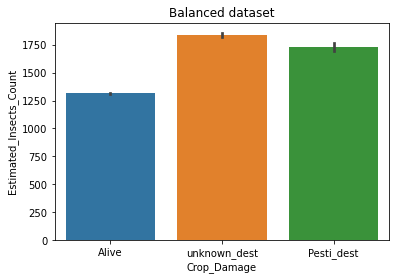

In [15]:
sns.barplot(data=train,x='Crop_Damage',y='Estimated_Insects_Count')
plt.xticks(ticks=[0,1,2],labels=['Alive','unknown_dest','Pesti_dest'])
plt.title('Balanced dataset')

Text(0.5, 1.0, 'Imbalanced dataset')

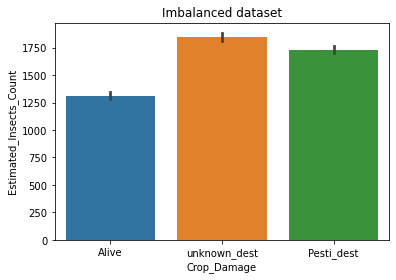

In [16]:
sns.barplot(data=train2,x='Crop_Damage',y='Estimated_Insects_Count')
plt.xticks(ticks=[0,1,2],labels=['Alive','unknown_dest','Pesti_dest'])
plt.title('Imbalanced dataset')

above plot indicates that insect play a major role in  destroying crops and hence declared as unknown. and the data makes sense because if their will be insects,their will be pesticides.

hence in Unknown destruction and Pesticide destruction the count of insect is huge

Q1: What type of crop attract insects the most?

Text(0.5, 1.0, 'Imbalanced dataset')

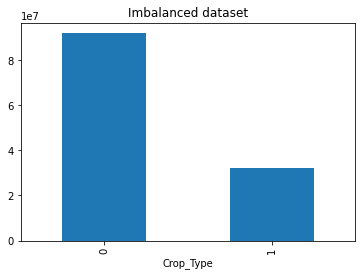

In [17]:
train.groupby('Crop_Type')['Estimated_Insects_Count'].sum().plot(kind='bar')
plt.title('Imbalanced dataset')

Text(0.5, 1.0, 'balanced dataset')

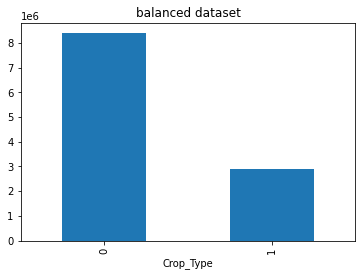

In [18]:
train2.groupby('Crop_Type')['Estimated_Insects_Count'].sum().plot(kind='bar')
plt.title('balanced dataset')


Crop 0 attracts more insects than crop type 1


In [19]:
#just wanted to try out of curiosity
# d={}
# for i in range(2):
#     for j in range(2):
#         d['crop'+str(i)+str(j)]=list(train.groupby('Soil_Type').get_group(i).groupby('Crop_Type').get_group(j)['Estimated_Insects_Count'] )
# d.keys()

does soil play any role?

Text(0.5, 1.0, 'Imbalanced dataset')

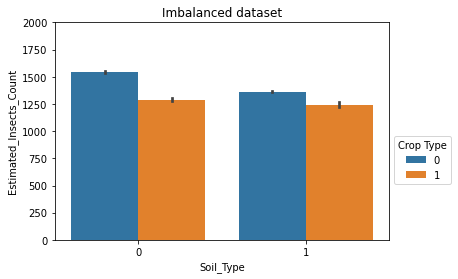

In [20]:
sns.barplot(data=train,x='Soil_Type',y='Estimated_Insects_Count',hue='Crop_Type')
plt.legend(bbox_to_anchor=(1,0.5),title='Crop Type')
plt.ylim(0,2000)
plt.title('Imbalanced dataset')

Text(0.5, 1.0, 'balanced dataset')

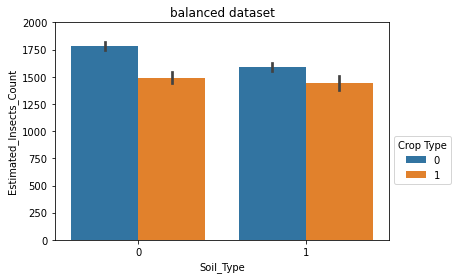

In [21]:
sns.barplot(data=train2,x='Soil_Type',y='Estimated_Insects_Count',hue='Crop_Type')
plt.legend(bbox_to_anchor=(1,0.5),title='Crop Type')
plt.ylim(0,2000)
plt.title('balanced dataset')

Nope,
Above graph indicates that, crop type 0 has insect count way more than crop type 1 and soil doesnt play any role in that

Text(0.5, 1.0, 'Imbalanced dataset')

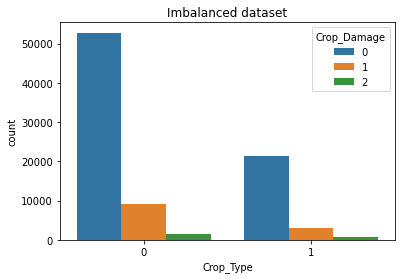

In [22]:
sns.countplot(data= train,x='Crop_Type',hue='Crop_Damage')
plt.title('Imbalanced dataset')

Here in the Imbalanced dataset, the difference may be seen because of the imbalanced in the dataset but i have already made a balanced dataset by just taking a sample from majority classes

Text(0.5, 1.0, 'balanced dataset')

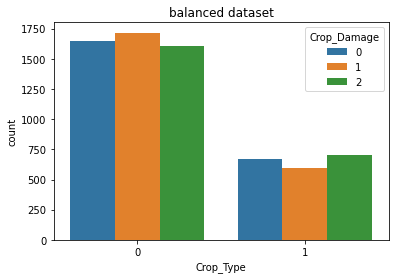

In [23]:
sns.countplot(data= train2,x='Crop_Type',hue='Crop_Damage')
plt.title('balanced dataset')

From above graph of balanced dataset we can see that crop 1 surely yeild less crops,less profit and thus less crops gets damaged.

yes, The variation were caused by the imbalance in the class distribution.
But, Just taking a sample from classes is costing us to loose some information which may be present in the dropped data
So, i will be using a Oversampling technique called SMOTE or Synthetic Minority Oversampling Technique which just populate the Minority classes with some linearly similar data as shown in the figure below
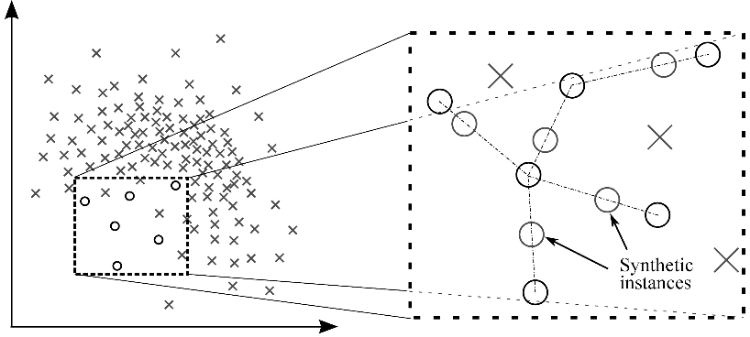

In [24]:
# from imblearn.over_sampling import SMOTE 
# from collections import Counter

# sm= SMOTE()
# train= train.dropna()
# X,y= sm.fit_resample(train.drop(['ID','Crop_Damage'],axis=1),train['Crop_Damage'])
# X['Crop_Damage']=y
# sns.countplot(data= X, x='Crop_Damage')
# plt.title('Distribution of target class')
# print('Class distribution :')
# _=[print(str(k)+' class has',str(v)+' Values') for k,v in Counter(y).items()]


In [25]:
def predict(train, model):
    X= train.drop(['ID','Crop_Damage'],axis=1)
    y= train['Crop_Damage']
    train_x,val_x,train_y,val_y= train_test_split(X,y)
    
    if model=='rfc':
        rf= RandomForestClassifier()
        rf.fit(train_x,train_y)
        answer= rf.predict(val_x)
        
    print('Accuracy is of {model} is :',accuracy_score(answer,val_y.values)*100)
    return rf
#84
train= train.dropna()
model= predict(train,'rfc')

Accuracy is of {model} is : 82.66466316053092


In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [27]:
with open('model_rf.pickle', 'wb') as output:
    pickle.dump(model, output)
    